TASK-5B: Please give concrete examples for each of the 4 domains of machine learning including classification, regression, clustering, and dimensionality reduction.

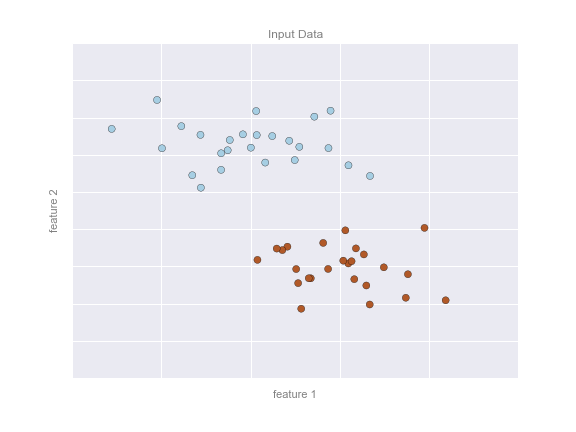

1.Grafik:Feature2:Yaş /Feature 1:Haftalık attığı adım sayısı. (Üstteki grup Yaşlılar-Alt grup Gençler)

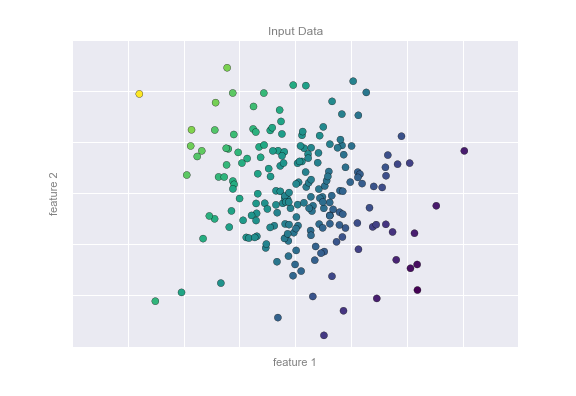

2.Grafik: Feature_2: Bisiklet sürme sıklığı, Feature_1: Günde tüketilen su miktarı. (İdrardaki Üre miktarı.)

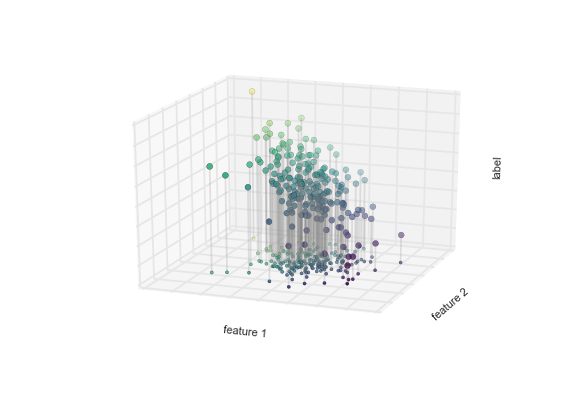

3.Grafik: Feature_1:Sigara kullanılan yıl (sağa doğru atıyor),Featur_2:Spor yapılan yıl (Sağa doğru artıyor),Label: Akciğer kapasitesi ya da sağlığı(Yukarı doğru artıyor)

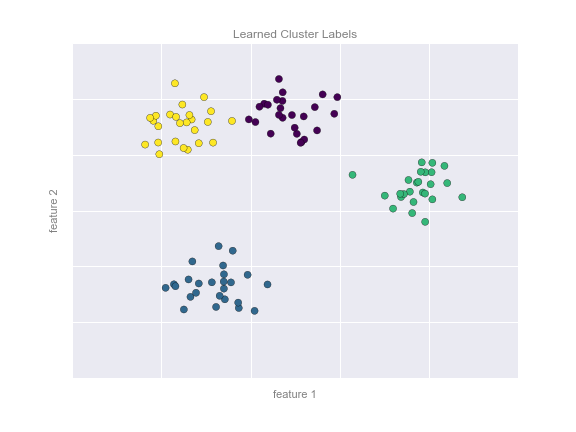

4.Grafik: Feature_2:Sipariş Sıklığı, Feature_1:Siparişin toplam tutarı. (Gruplar ise müşteri grupları)

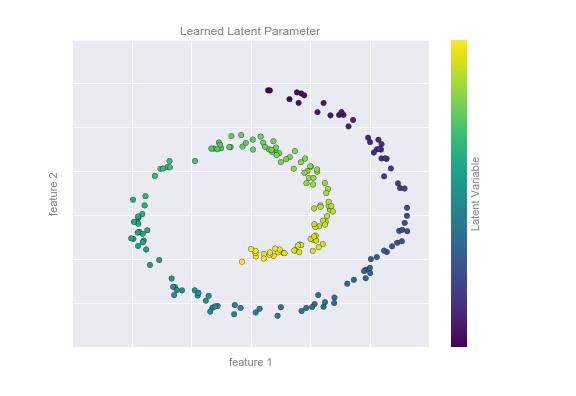

5.Grafik: Feature_1: Rakıma göre basınç veya oksijen seviyesi, Feature_2:Ortamdaki Su miktarı(ml), (Bakteriler tarafından sentezlenen enzim vb miktarları/renklerde türler.)

TASK-5C: Please run the GaussianNB algorithm for 20 different values with respect to varr_smoothing parameter to find the best model. Then please visualize your findings via a lineplot (matplotlib) to illustrate the more appropriate values/ranges.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

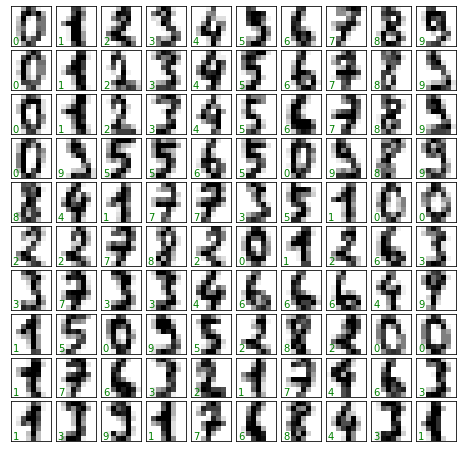

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)

Unsupervised learning: Dimensionality reduction

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


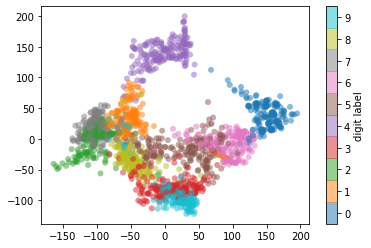

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Verileri Train ve Test diye ayırıyoruz.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

Gaussian Naive Bayes(GNB) kullanarak modelimizi eğiticez bunu yaparken 20 farklı 'var_smooting' değeriyle çalıştırıcaz ve sonuçları gözlemliycez.Bir nevi 'parameter tunung' yapıcaz. Sonra bu parametre ve sonuçları karşılaştırıp en iyi parametre değerini(20farklı değer içinde) seçmekiçin grafikleştiricez.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
acc=[]
ındex_i=[]
for i in range(1,21):
  var_smt= float(10**(-i))
  model = GaussianNB(var_smoothing=var_smt)
  model.fit(Xtrain, ytrain)
  y_model = model.predict(Xtest)
  acc.append(accuracy_score(ytest, y_model))
  ındex_i.append(var_smt)
  print("val_smooting değeri: 1e-{} ve bu parametre ile elde edilen accuracy: {}".format(i,acc[(i-1)]))

val_smooting değeri: 1e-1 ve bu parametre ile elde edilen accuracy: 0.9288888888888889
val_smooting değeri: 1e-2 ve bu parametre ile elde edilen accuracy: 0.9333333333333333
val_smooting değeri: 1e-3 ve bu parametre ile elde edilen accuracy: 0.9155555555555556
val_smooting değeri: 1e-4 ve bu parametre ile elde edilen accuracy: 0.8933333333333333
val_smooting değeri: 1e-5 ve bu parametre ile elde edilen accuracy: 0.8911111111111111
val_smooting değeri: 1e-6 ve bu parametre ile elde edilen accuracy: 0.8777777777777778
val_smooting değeri: 1e-7 ve bu parametre ile elde edilen accuracy: 0.8644444444444445
val_smooting değeri: 1e-8 ve bu parametre ile elde edilen accuracy: 0.8422222222222222
val_smooting değeri: 1e-9 ve bu parametre ile elde edilen accuracy: 0.8333333333333334
val_smooting değeri: 1e-10 ve bu parametre ile elde edilen accuracy: 0.8088888888888889
val_smooting değeri: 1e-11 ve bu parametre ile elde edilen accuracy: 0.8022222222222222
val_smooting değeri: 1e-12 ve bu parametr

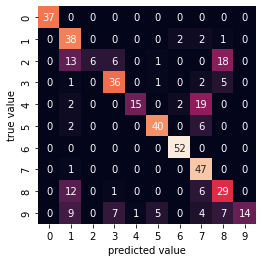

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

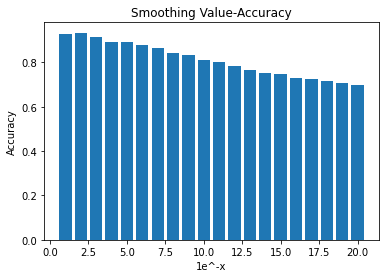

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(range(1,21),acc)
plt.xlabel("1e^-x")
plt.ylabel("Accuracy")
plt.title("Smoothing Value-Accuracy")
plt.show()

Denemiş olduğum 20 farklı değer içinden val_smoothing=1e-2 değeri aralarından en yüksek accuracy'i vermiş bulundu. Parametre değerini bu şekilde alarak çalıştırıyorum.
 

In [ ]:
model = GaussianNB(var_smoothing=1e-2)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.9333333333333333

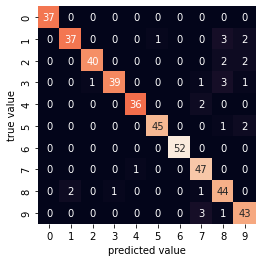

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

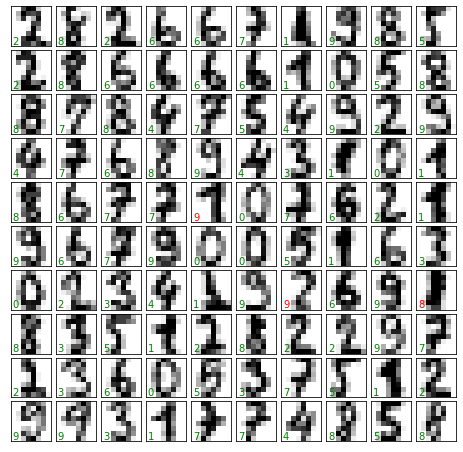

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

TASK-5D: Please use two different algorithms (other than GaussianNB) with their default parameter values and then compare your findings to the ones obtained in Task-5C.

> 1- Nearest Neighbourhood Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model2= KNeighborsClassifier()
model2.fit(Xtrain, ytrain)
y_model = model2.predict(Xtest)
accuracy_score(ytest, y_model)

0.98

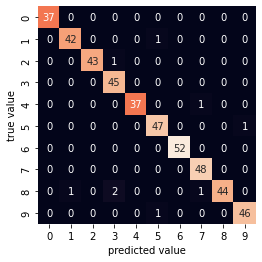

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

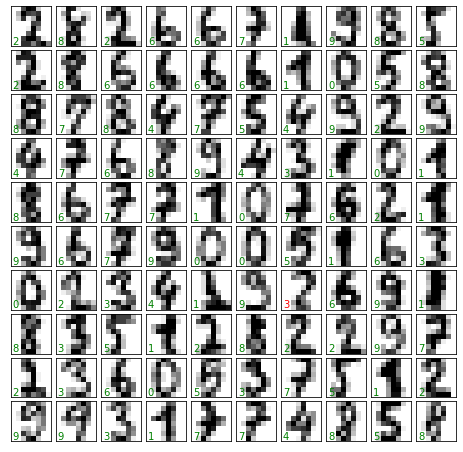

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

2-Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model3=SVC()
model3.fit(Xtrain, ytrain)
y_model = model3.predict(Xtest)
accuracy_score(ytest, y_model)

0.9911111111111112

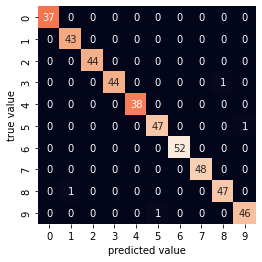

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

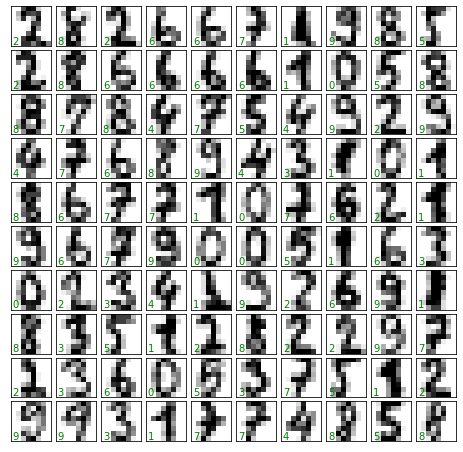

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')